In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
time_series = pd.read_csv("/Users/dang/Desktop/Learning/DataScience_SupplyChain/Jupyternotebook_source/Section_11/timeseries.csv")

In [3]:
time_series.head()

,Unnamed: 0,week,month,year,date,total_revenue
0,113,49,12,2009,2009-12-01,232177.51
1,116,50,12,2009,2009-12-07,207908.73
2,118,51,12,2009,2009-12-14,207685.87
3,120,52,12,2009,2009-12-21,35731.90
4,0,1,1,2010,2010-01-04,167636.95


In [4]:
time_series['date'] = pd.to_datetime(time_series['date'])

In [5]:
time_series = time_series.set_index('date')

In [6]:
time_series.head()

,Unnamed: 0,week,month,year,total_revenue
date,,,,,
2009-12-01,113,49,12,2009,232177.51
2009-12-07,116,50,12,2009,207908.73
2009-12-14,118,51,12,2009,207685.87
2009-12-21,120,52,12,2009,35731.90
2010-01-04,0,1,1,2010,167636.95


In [7]:
monthly_series = time_series.total_revenue.resample("M").sum()

<AxesSubplot:xlabel='date'>

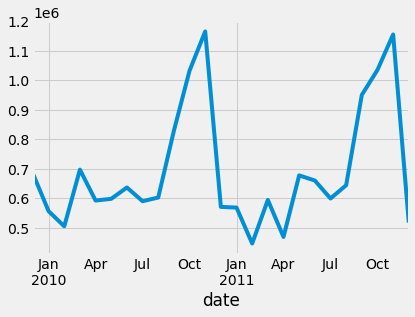

In [8]:
monthly_series.plot()

In [9]:
component = sm.tsa.seasonal_decompose(monthly_series)

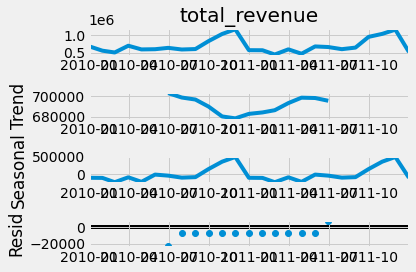

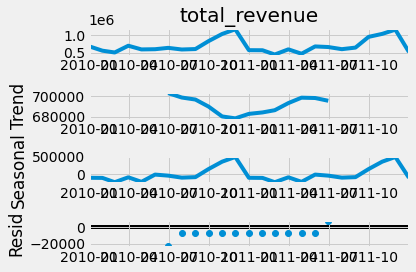

In [10]:
component.plot()

In [11]:
trend = component.trend

<AxesSubplot:xlabel='date'>

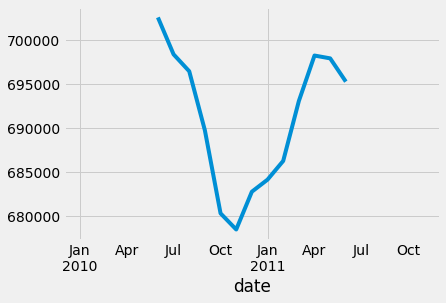

In [12]:
trend.plot()

In [13]:
seasonality = component.seasonal

<AxesSubplot:xlabel='date'>

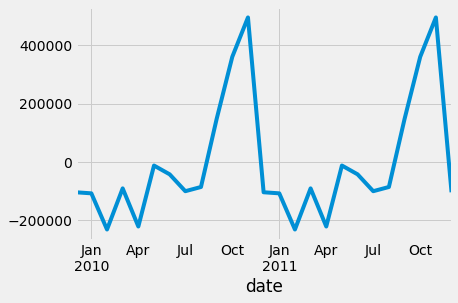

In [14]:
seasonality.plot()

In [15]:
remainder = component.resid

<AxesSubplot:xlabel='date'>

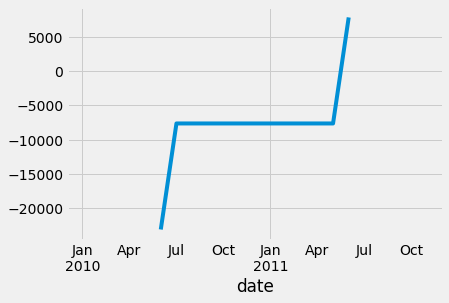

In [16]:
remainder.plot()

In [17]:
### checking for stationarity

<AxesSubplot:xlabel='date'>

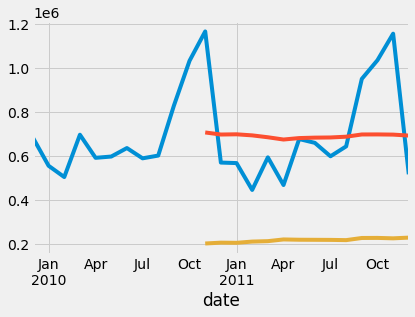

In [18]:
monthly_series.plot()
monthly_series.rolling(window=12).mean().plot()
monthly_series.rolling(window=12).std().plot()

In [19]:
ad_fuller_test = sm.tsa.stattools.adfuller(monthly_series, autolag='AIC')

In [20]:
ad_fuller_test

(-3.3721713796058284,
 0.011944929456308585,
 9,
 15,
 {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445},
 396.2847212200463)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

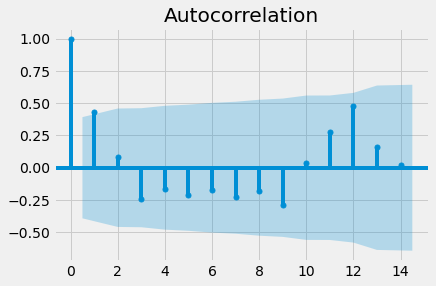

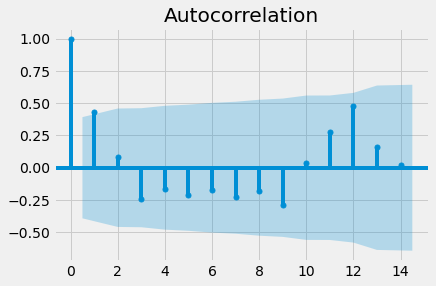

In [22]:
plot_acf(monthly_series)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 12.

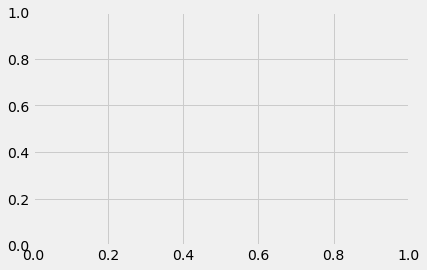

In [26]:
plot_pacf(monthly_series)

In [29]:
model_ma = sm.tsa.statespace.SARIMAX(monthly_series, order=(0,0,1))

In [30]:
results = model_ma.fit()

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [32]:
results.aic

733.136061481974

In [33]:
model_ar = sm.tsa.statespace.SARIMAX(monthly_series, order=(1,0,1))

In [34]:
results = model_ar.fit()

In [35]:
results.aic

693.3936087978008